<a href="https://colab.research.google.com/github/Susmita-Priya/twitter_depression/blob/main/Twitter_dataset2(without_preprocessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Detection Using Twitter Dataset

In [ ]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
twitter_df = pd.read_csv('/content/drive/MyDrive/Dataset/Suicide_Detection (1).csv', encoding =('ISO-8859-1'),low_memory =False)
twitter_df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"Iâm so lostHello, my name is Adam (16) and I...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty teaðð¦â¼ï...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

twitter_df['class'] = twitter_df['class'].replace('non-suicide', 0)
twitter_df['class'] = twitter_df['class'].replace('suicide', 1)

In [ ]:
# RENAMING COLUMNS

twitter_df = twitter_df.rename(columns = {"text":"Text", "class" :"Category" })

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Unnamed: 0,Text,Category
0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,3,Am I weird I don't get affected by compliments...,0
2,4,Finally 2020 is almost over... So I can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"Iâm so lostHello, my name is Adam (16) and I...",1


In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

twitter_df = twitter_df[["Text", "Category"]]

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Text,Category
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"Iâm so lostHello, my name is Adam (16) and I...",1


In [ ]:
## Let's see some of the text

twitter_df.loc[10311]['Text']

'Hey listen Can some one send me a link to a Mega/drive file whit ajr neotheater and ajr the click mp3?\nIm going to be a month without internet and i need to download the music.\nYouTube converter mp3 is too slow and usually doesnâ\x80\x99t work for me'

In [ ]:
# CHECK THE SHAPE OF THE DATA

twitter_df.shape

(232074, 2)

In [ ]:
# CHECK INFO REGARDING IT

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      232074 non-null  object
 1   Category  232074 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
twitter_df["Category"].value_counts()

1    116037
0    116037
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

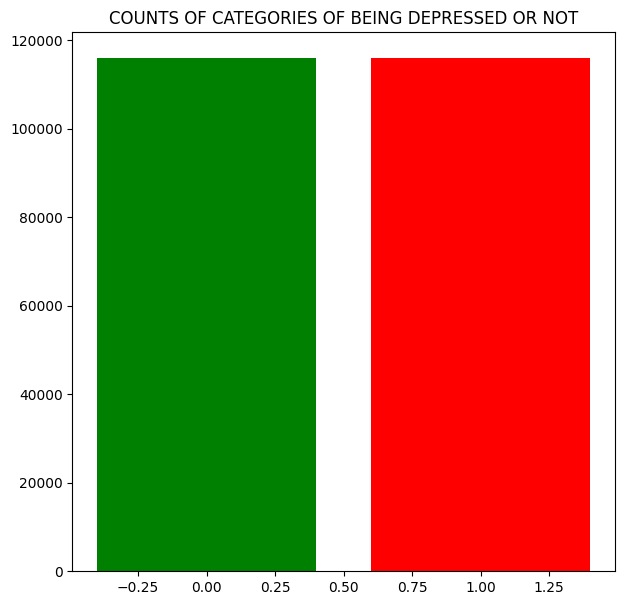

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(7, 7))
plt.bar(twitter_df["Category"].unique(), twitter_df["Category"].value_counts(),
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [ ]:
# install wordcloud

!pip install wordcloud

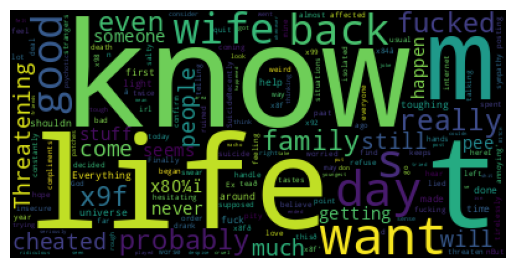

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = twitter_df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [ ]:
# Assuming 'text' is the feature and 'label' is the target variable
X = twitter_df['Text']
y = twitter_df['Category']

# TEXT VECTORIZATION

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# FITTING OUR MACHINE LEARNING MODELS

1) LOGISTIC REGRESSION MODEL

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [ ]:
# Create a machine learning model (Logistic Regression in this example)
model = LogisticRegression( random_state=42)

# Train the model on the TF-IDF transformed training set
model.fit(X_train, y_train)

# Make predictions on the TF-IDF transformed test set
y_pred_lr = model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr}")

Accuracy: 0.9370462135085641


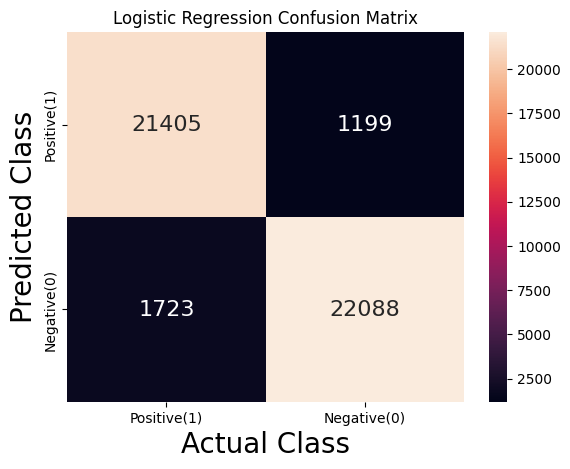

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Plot confusion matrix
cm = confusion_matrix(y_pred_lr, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

2) DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')


Decision Tree Accuracy: 0.8595497145319401


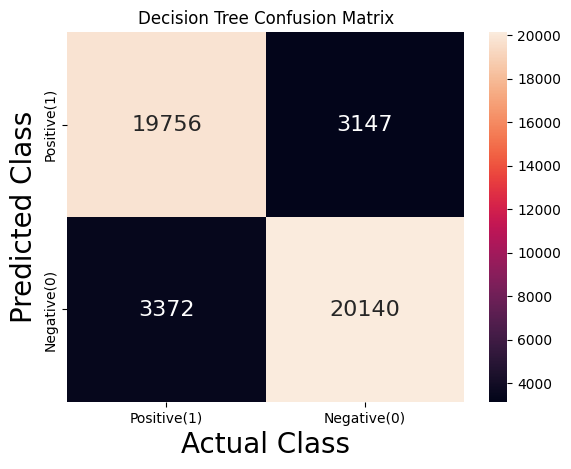

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_dt, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

3) RANDOM FORESTS CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.8894538403533341


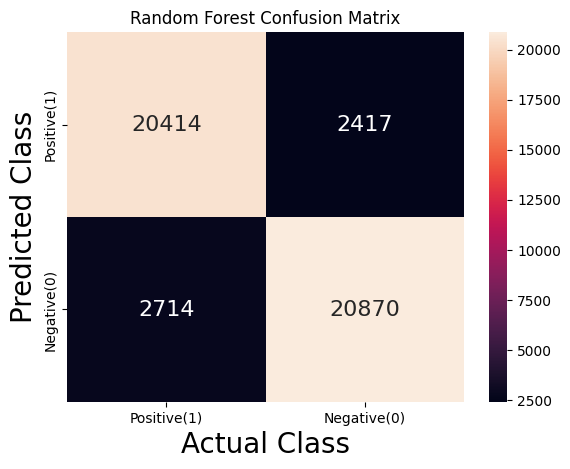

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_rf, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

4) Gradient Boosting Model:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb}')

Accuracy: 0.885080254228159


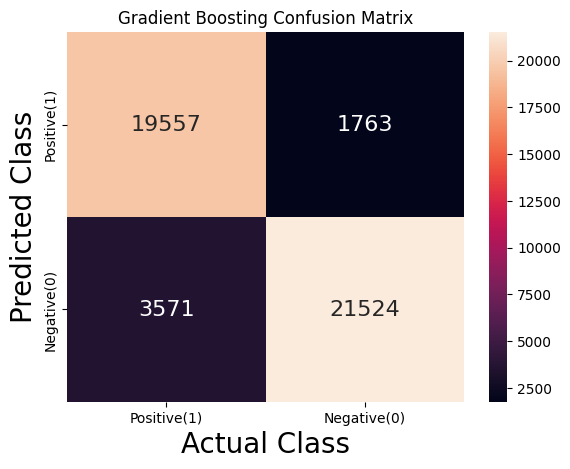

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_gb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

5) Naive Bayes Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')


Naive Bayes Accuracy: 0.8791123559194226


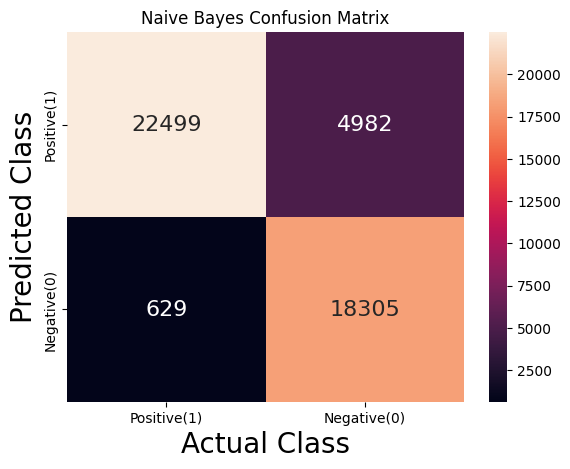

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_nb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Assuming 'text' is the feature and 'label' is the target variable
X = twitter_df['Text']
y = twitter_df['Category']

# Tokenize and pad sequences
max_words = 10000
maxlen = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
# Assuming binary classification, adjust accordingly
y_binary = (y > 0).astype(int)
# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_padded, y_binary, test_size=0.2, random_state=42)

6) LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# LSTM
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_lstm = (y_pred > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_testt, y_pred_lstm)
print(f'LSTM Accuracy: {accuracy_lstm}')


Epoch 1/5
2901/2901 [==============================] - 799s 275ms/step - loss: 0.2085 - accuracy: 0.9212
Epoch 2/5
2901/2901 [==============================] - 788s 272ms/step - loss: 0.1635 - accuracy: 0.9391
Epoch 3/5
2901/2901 [==============================] - 792s 273ms/step - loss: 0.1435 - accuracy: 0.9463
Epoch 4/5
2901/2901 [==============================] - 800s 276ms/step - loss: 0.1274 - accuracy: 0.9524
Epoch 5/5
1451/1451 [==============================] - 22s 15ms/step
LSTM Accuracy: 0.9317246579769471


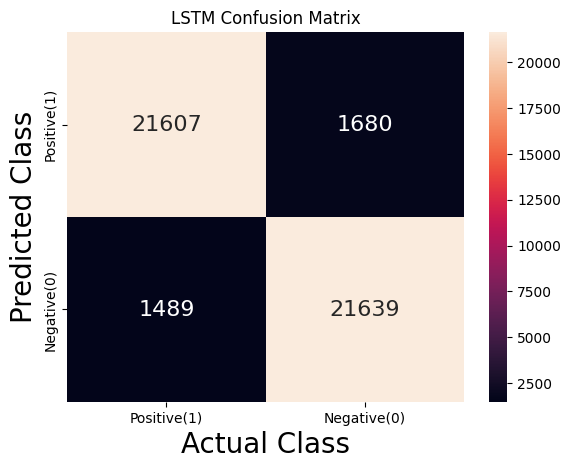

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_testt, y_pred_lstm)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("LSTM Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

7) CNN model

In [ ]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense

# CNN
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_cnn = (y_pred > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_testt, y_pred_cnn)
print(f'CNN Accuracy: {accuracy_cnn}')


Epoch 1/5
2901/2901 [==============================] - 583s 200ms/step - loss: 0.2105 - accuracy: 0.9177
Epoch 2/5
2901/2901 [==============================] - 587s 202ms/step - loss: 0.1472 - accuracy: 0.9457
Epoch 3/5
2901/2901 [==============================] - 583s 201ms/step - loss: 0.1136 - accuracy: 0.9593
Epoch 4/5
2901/2901 [==============================] - 583s 201ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 5/5
1451/1451 [==============================] - 6s 4ms/step
CNN Accuracy: 0.9250457826133793


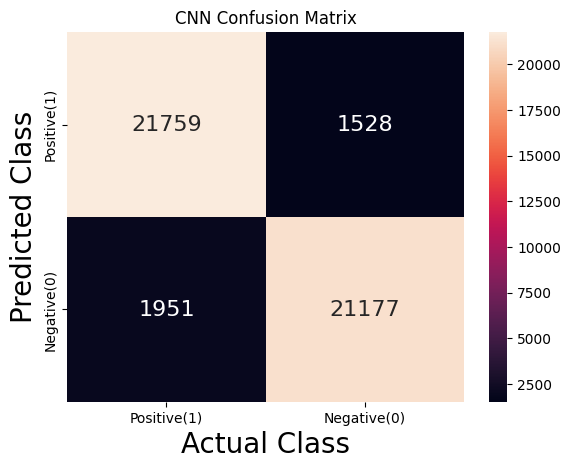

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_testt, y_pred_cnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("CNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

8) RNN model

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# RNN
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_trainn, y_trainn, epochs=5, batch_size=64)

# Evaluate the model
y_pred = model.predict(X_testt)
y_pred_rnn = (y_pred > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_testt, y_pred_rnn)
print(f'RNN Accuracy: {accuracy_rnn}')

Epoch 1/5
2901/2901 [==============================] - 571s 197ms/step - loss: 0.3199 - accuracy: 0.8706
Epoch 2/5
2901/2901 [==============================] - 574s 198ms/step - loss: 0.3177 - accuracy: 0.8740
Epoch 3/5
2901/2901 [==============================] - 568s 196ms/step - loss: 0.3297 - accuracy: 0.8658
Epoch 4/5
2901/2901 [==============================] - 565s 194ms/step - loss: 0.3158 - accuracy: 0.8688
Epoch 5/5
1451/1451 [==============================] - 9s 6ms/step
RNN Accuracy: 0.840762684477001


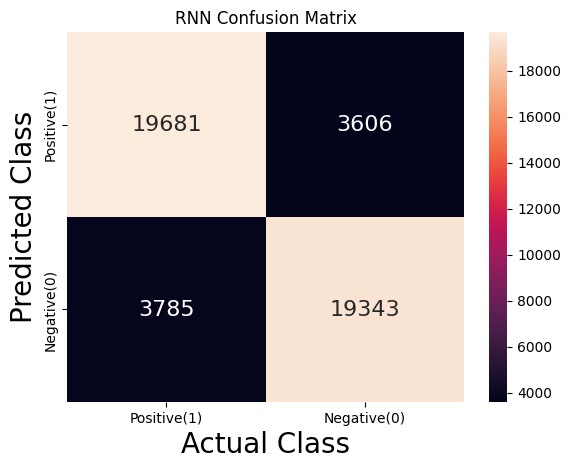

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_testt, y_pred_rnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("RNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

EVALUATING OUR MODELS

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression Classifier is: ", accuracy_lr, "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_dt, "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_rf, "\n")
print("Accuracy Score of our Gradient bosting Classifier is: ", accuracy_gb, "\n")
print("Accuracy Score of our Naive Baias Classifier is: ", accuracy_nb, "\n")
print("Accuracy Score of our LSTM Classifier is: ", accuracy_lstm, "\n")
print("Accuracy Score of our CNN Classifier is: ", accuracy_cnn, "\n")
print("Accuracy Score of our RNN Classifier is: ", accuracy_rnn, "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression Classifier is:  0.9370462135085641 

Accuracy Score of our Decision Tree Classifier is:  0.8595497145319401 

Accuracy Score of our Random Forest Classifier is:  0.8894538403533341 

Accuracy Score of our Gradient bosting Classifier is:  0.885080254228159 

Accuracy Score of our Naive Baias Classifier is:  0.8791123559194226 

Accuracy Score of our LSTM Classifier is:  0.9317246579769471 

Accuracy Score of our CNN Classifier is:  0.9250457826133793 

Accuracy Score of our RNN Classifier is:  0.840762684477001 



<Figure size 10000x10000 with 0 Axes>

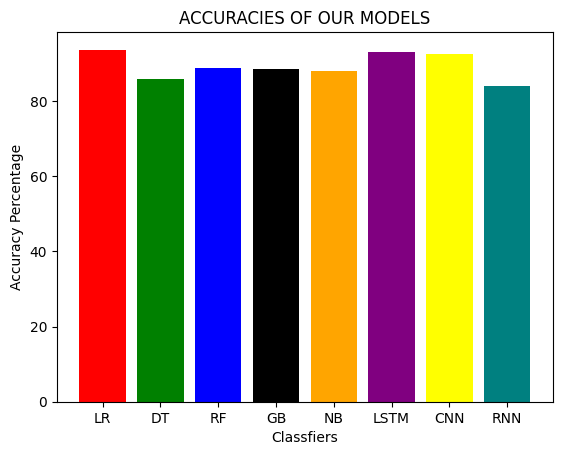

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["LR","DT", "RF", "GB","NB", "LSTM","CNN","RNN"], height = [(accuracy_lr)*100, (accuracy_dt)*100,(accuracy_rf)*100,(accuracy_gb)*100,(accuracy_nb)*100,(accuracy_lstm)*100,(accuracy_cnn)*100,(accuracy_rnn)*100], color = ["red", "green", "blue", "Black", "orange","purple","yellow","Teal"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Classfiers")
plt.figure(figsize=(100,100))

In [ ]:
# CHECKING Binary Cross-Entropy Loss OF MODELS

print("THE Binary Cross-Entropy Loss OF OUR MODELS:", "\n")
print("Loss of our Logistic Regression model is: ", log_loss(y_pred_lr, y_test), "\n")
print("Loss of our Decision Tree Classifier is: ", log_loss(y_pred_dt, y_test), "\n")
print("Loss of our Random Forest Classifier is: ", log_loss(y_pred_rf, y_test), "\n")
print("Loss of our gradient boost Classifier is: ", log_loss(y_pred_gb, y_test), "\n")
print("Loss of our NaiveBayes Classifier is: ", log_loss(y_pred_nb, y_test), "\n")
print("Loss of our LSTM Classifier is: ",log_loss(y_pred_lstm,y_test), "\n")
print("Loss of our CNN Classifier is: ", log_loss(y_pred_cnn, y_test), "\n")
print("Loss of our RNN Classifier is: ", log_loss(y_pred_rnn, y_test), "\n")

THE Binary Cross-Entropy Loss OF OUR MODELS: 

Loss of our Logistic Regression model is:  2.269084459829803 

Loss of our Decision Tree Classifier is:  5.062341407813308 

Loss of our Random Forest Classifier is:  3.9844874618024364 

Loss of our gradient boost Classifier is:  4.142127484165698 

Loss of our NaiveBayes Classifier is:  4.357232342267292 

Loss of our LSTM Classifier is:  2.4608927629023434 

Loss of our CNN Classifier is:  2.701623831535895 

Loss of our RNN Classifier is:  5.7394946073244615 



In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")
print("F1 Score of our gradient boost Classifier is: ", f1_score(y_pred_gb, y_test), "\n")
print("F1 Score of our NaiveBayes Classifier is: ", f1_score(y_pred_nb, y_test), "\n")
print("F1 Score of our LSTM Classifier is: ", f1_score(y_pred_lstm,y_test), "\n")
print("F1 Score of our CNN Classifier is: ", f1_score(y_pred_cnn, y_test), "\n")
print("F1 Score of our RNN Classifier is: ", f1_score(y_pred_rnn, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9361060089215429 

F1 Score of our Decision Tree Classifier is:  0.8583780495752863 

F1 Score of our Random Forest Classifier is:  0.8883570138601797 

F1 Score of our gradient boost Classifier is:  0.8799946004319655 

F1 Score of our NaiveBayes Classifier is:  0.8891303918275405 

F1 Score of our LSTM Classifier is:  0.9317716967726657 

F1 Score of our CNN Classifier is:  0.9240939934108612 

F1 Score of our RNN Classifier is:  0.8395945916617835 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")
print("Recall Score of our gradient boost Classifier is: ", recall_score(y_pred_gb, y_test), "\n")
print("Recall Score of our NaiveBayes Classifier is: ", recall_score(y_pred_nb, y_test), "\n")
print("Recall Score of our LSTM Classifier is: ", recall_score(y_pred_lstm,y_test), "\n")
print("Recall Score of our CNN Classifier is: ", recall_score(y_pred_cnn, y_test), "\n")
print("Recall Score of our RNN Classifier is: ", recall_score(y_pred_rnn, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  0.9469562909219608 

Recall Score of our Decision Tree Classifier is:  0.8625944199449854 

Recall Score of our Random Forest Classifier is:  0.8941351670973676 

Recall Score of our gradient boost Classifier is:  0.9173076923076923 

Recall Score of our NaiveBayes Classifier is:  0.8187111094938321 

Recall Score of our LSTM Classifier is:  0.9279557442428921 

Recall Score of our CNN Classifier is:  0.9327020480070469 

Recall Score of our RNN Classifier is:  0.8428689703255043 



In [ ]:
# CHECKING THE PRECISION score

print("THE PRECISION SCORES OF OUR MODELS", "\n")
print("PRECISION Score of our Logistic Regression model is: ", precision_score(y_pred_lr, y_test), "\n")
print("PRECISION Score of our Decision Tree Classifier is: ", precision_score(y_pred_dt, y_test), "\n")
print("PRECISION Score of our Random Forest Classifier is: ", precision_score(y_pred_rf, y_test), "\n")
print("PRECISION Score of our gradient boost Classifier is: ", precision_score(y_pred_gb, y_test), "\n")
print("PRECISION Score of our NaiveBayes Classifier is: ", precision_score(y_pred_nb, y_test), "\n")
print("PRECISION Score of our LSTM Classifier is: ", precision_score(y_test,y_pred_lstm) ,"\n")
print("PRECISION Score of our CNN Classifier is: ", precision_score(y_pred_cnn, y_test), "\n")
print("PRECISION Score of our RNN Classifier is: ", precision_score(y_pred_rnn, y_test), "\n")

THE PRECISION SCORES OF OUR MODELS 

PRECISION Score of our Logistic Regression model is:  0.9255015565548254 

PRECISION Score of our Decision Tree Classifier is:  0.8542026980283639 

PRECISION Score of our Random Forest Classifier is:  0.8826530612244898 

PRECISION Score of our gradient boost Classifier is:  0.8455984088550674 

PRECISION Score of our NaiveBayes Classifier is:  0.9728035281909374 

PRECISION Score of our LSTM Classifier is:  0.9279557442428921 

PRECISION Score of our CNN Classifier is:  0.9156433759944655 

PRECISION Score of our RNN Classifier is:  0.836345555171221 



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_lr = mean_absolute_error(y_pred_lr, y_test)
mae_dt = mean_absolute_error(y_pred_dt, y_test)
mae_rf = mean_absolute_error(y_pred_rf, y_test)
mae_gb = mean_absolute_error(y_pred_gb, y_test)
mae_mnb = mean_absolute_error(y_pred_nb, y_test)
mae_lstm = mean_absolute_error(y_pred_lstm, y_test)
mae_cnn = mean_absolute_error(y_pred_cnn, y_test)
mae_rnn = mean_absolute_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN ABSOLUTE ERROR OF OUR MODELS", "\n")
print("MEAN ABSOLUTE ERROR of our Logistic Regression model is: ", mae_lr, "\n")
print("MEAN ABSOLUTE ERROR of our Decision Tree Classifier is: ", mae_dt, "\n")
print("MEAN ABSOLUTE ERROR of our Random Forest Classifier is: ", mae_rf, "\n")
print("MEAN ABSOLUTE ERROR of our gradient boost Classifier is: ", mae_gb, "\n")
print("MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is: ", mae_mnb, "\n")
print("MEAN ABSOLUTE ERROR Score of our LSTM Classifier is: ", mae_lstm ,"\n")
print("MEAN ABSOLUTE ERROR of our CNN Classifier is: ", mae_cnn, "\n")
print("MEAN ABSOLUTE ERROR of our RNN Classifier is: ", mae_rnn, "\n")

MEAN ABSOLUTE ERROR OF OUR MODELS 

MEAN ABSOLUTE ERROR of our Logistic Regression model is:  0.06295378649143596 

MEAN ABSOLUTE ERROR of our Decision Tree Classifier is:  0.1404502854680599 

MEAN ABSOLUTE ERROR of our Random Forest Classifier is:  0.11054615964666595 

MEAN ABSOLUTE ERROR of our gradient boost Classifier is:  0.114919745771841 

MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is:  0.1208876440805774 

MEAN ABSOLUTE ERROR Score of our LSTM Classifier is:  0.0682753420230529 

MEAN ABSOLUTE ERROR of our CNN Classifier is:  0.07495421738662071 

MEAN ABSOLUTE ERROR of our RNN Classifier is:  0.15923731552299902 



In [ ]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
mse_dt = mean_squared_error(y_pred_dt, y_test)
mse_rf = mean_squared_error(y_pred_rf, y_test)
mse_gb = mean_squared_error(y_pred_gb, y_test)
mse_mnb = mean_squared_error(y_pred_nb, y_test)
mse_lstm = mean_squared_error(y_pred_lstm, y_test)
mse_cnn = mean_squared_error(y_pred_cnn, y_test)
mse_rnn = mean_squared_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("MEAN SQUARE ERROR of our Logistic Regression model is: ", mse_lr, "\n")
print("MEAN SQUARE ERROR of our Decision Tree Classifier is: ", mse_dt, "\n")
print("MEAN SQUARE ERROR of our Random Forest Classifier is: ", mse_rf, "\n")
print("MEAN SQUARE ERROR of our gradient boost Classifier is: ", mse_gb, "\n")
print("MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", mse_mnb, "\n")
print("MEAN SQUARE ERROR Score of our LSTM Classifier is: ", mse_lstm ,"\n")
print("MEAN SQUARE ERROR of our CNN Classifier is: ", mse_cnn, "\n")
print("MEAN SQUARE ERROR of our RNN Classifier is: ", mse_rnn, "\n")

MEAN SQUARE ERROR OF OUR MODELS 

MEAN SQUARE ERROR of our Logistic Regression model is:  0.06295378649143596 

MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.1404502854680599 

MEAN SQUARE ERROR of our Random Forest Classifier is:  0.11054615964666595 

MEAN SQUARE ERROR of our gradient boost Classifier is:  0.114919745771841 

MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.1208876440805774 

MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.0682753420230529 

MEAN SQUARE ERROR of our CNN Classifier is:  0.07495421738662071 

MEAN SQUARE ERROR of our RNN Classifier is:  0.15923731552299902 



In [ ]:
rmse_lr = np.sqrt(mse_lr)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_gb = np.sqrt(mae_gb)
rmse_mnb = np.sqrt(mse_mnb)
rmse_lstm = np.sqrt(mse_lstm)
rmse_cnn = np.sqrt(mse_cnn)
rmse_rnn = np.sqrt(mse_rnn)

In [ ]:
print("ROOT MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("ROOT MEAN SQUARE ERROR of our Logistic Regression model is: ", rmse_lr, "\n")
print("ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is: ", rmse_dt, "\n")
print("ROOT MEAN SQUARE ERROR of our Random Forest Classifier is: ", rmse_rf, "\n")
print("ROOT MEAN SQUARE ERROR of our gradient boost Classifier is: ", rmse_gb, "\n")
print("ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", rmse_mnb, "\n")
print("ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is: ", rmse_lstm ,"\n")
print("ROOT MEAN SQUARE ERROR of our CNN Classifier is: ", rmse_cnn, "\n")
print("ROOT MEAN SQUARE ERROR of our RNN Classifier is: ", rmse_rnn, "\n")

ROOT MEAN SQUARE ERROR OF OUR MODELS 

ROOT MEAN SQUARE ERROR of our Logistic Regression model is:  0.2509059315588931 

ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.3747669748898106 

ROOT MEAN SQUARE ERROR of our Random Forest Classifier is:  0.33248482619010744 

ROOT MEAN SQUARE ERROR of our gradient boost Classifier is:  0.3389981501009128 

ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.3476890048312966 

ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.26129550708547 

ROOT MEAN SQUARE ERROR of our CNN Classifier is:  0.2737776787589169 

ROOT MEAN SQUARE ERROR of our RNN Classifier is:  0.3990455055792497 

